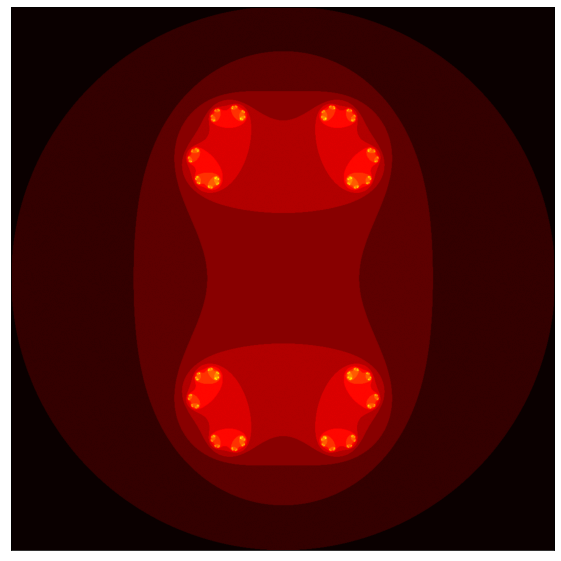

In [11]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import numba
from numba import jit, vectorize
from typing import List
from IPython.display import HTML

%matplotlib inline

@vectorize([numba.float64(numba.complex128), numba.float32(numba.complex64)])
def abs_square(z: complex) -> int:
    return z.real ** 2 + z.imag ** 2


@jit(nopython=True, parallel=True)
def get_julia_set(
    width: int, height: int, c: complex, r: int, max_iter: int
) -> np.ndarray:
    julia_set = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            zx = np.interp(i, (0, width), (-r, r))
            zy = np.interp(j, (0, height), (-r, r))
            z = complex(zx, zy)
            for iter in range(max_iter):
                if abs_square(z) > r ** 2:
                    # print(z, abs_square(z), r**2)
                    julia_set[j, i] = iter
                    break
                z = z ** 2 + c
    return julia_set


def plot_julia(width: int, height: int, cs:List[complex], r: int, max_iter: int):
    fps = 60.
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()

    def animate(i):
        ax.clear()
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        
        julia_set = get_julia_set(width, height, cs[i], r, max_iter)
        im = ax.imshow(julia_set, cmap=cm.hot, interpolation="hamming")
        return im,
    return FuncAnimation(fig, animate, frames=len(cs), interval=1000./fps, blit=True)

if __name__ == "__main__":
    r = 2
    max_iter = 30
    width = 1080
    height = 1080
    cs = [0.7885*np.exp(1j*a) for a in np.linspace(0, 2*np.pi, 100)]

    animation = plot_julia(width, height, cs, r, max_iter)
    plt.rc('animation', html='html5')
    HTML(animation.to_html5_video())


In [12]:

    plt.rc('animation', html='html5')
    HTML(animation.to_html5_video())